## By hand-made data

In [367]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt

In [327]:
torch.manual_seed(42)
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 1.5
X = torch.cat([X1, X2], dim=0)
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)
print(X.size())
print(Y.size())

torch.Size([2000, 50])
torch.Size([2000, 1])


In [328]:
class LogisticModel(torch.nn.Module):
     def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(50, 1)
    
     def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred


In [371]:
torch.manual_seed(42)
model = LogisticModel()
print(model.state_dict())

loss_func = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []
for epoch in range(20):
    model.train()
    y_hat = model(X)
    loss = loss_func(y_hat, Y)
    print(epoch, loss.data)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.data.numpy())
    
    
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[ 0.1081,  0.1174, -0.0331,  0.1299, -0.0310,  0.0285, -0.0689,  0.0831,
          0.1247, -0.1038,  0.1229,  0.0265,  0.1045,  0.0192,  0.0682, -0.0200,
          0.1090,  0.0209, -0.0660,  0.0360, -0.0652, -0.0166, -0.0574,  0.0938,
         -0.1116, -0.0652, -0.0399, -0.0850,  0.0133, -0.1397,  0.1277, -0.1201,
          0.1092,  0.0235, -0.0459,  0.0874,  0.0220,  0.1143,  0.0155, -0.0446,
          0.0380, -0.0384,  0.0595,  0.1263,  0.0817, -0.0618,  0.0816,  0.0253,
          0.0718, -0.0862]])), ('linear.bias', tensor([-0.1400]))])
0 tensor(0.4800)
1 tensor(0.4639)
2 tensor(0.4507)
3 tensor(0.4396)
4 tensor(0.4302)
5 tensor(0.4222)
6 tensor(0.4153)
7 tensor(0.4092)
8 tensor(0.4039)
9 tensor(0.3991)
10 tensor(0.3949)
11 tensor(0.3910)
12 tensor(0.3876)
13 tensor(0.3844)
14 tensor(0.3815)
15 tensor(0.3788)
16 tensor(0.3763)
17 tensor(0.3740)
18 tensor(0.3718)
19 tensor(0.3698)
OrderedDict([('linear.weight', tensor([[ 0.1255,  0.1335, -0.0138

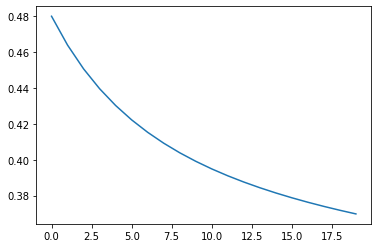

In [335]:
plt.plot(losses)

In [365]:
torch.manual_seed(42)
X1_test = torch.randn(10, 50)
X2_test = torch.randn(10, 50) + 1.5
X_test = torch.cat([X1_test, X2_test], dim = 0)
model(X_test)

tensor([[0.1918],
        [0.5481],
        [0.4388],
        [0.3272],
        [0.5106],
        [0.6808],
        [0.2541],
        [0.2363],
        [0.4658],
        [0.4278],
        [0.8857],
        [0.9182],
        [0.9192],
        [0.9498],
        [0.9792],
        [0.8666],
        [0.8778],
        [0.8764],
        [0.9373],
        [0.9086]], grad_fn=<SigmoidBackward>)